

```
# This is formatted as code
```

# Problem 2

## Initialize python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Define probability function

In [ ]:
def phif(x):
    return x*np.exp(-2*x)

## Plot out function

Text(0, 0.5, 'Relative probability (1/x)')

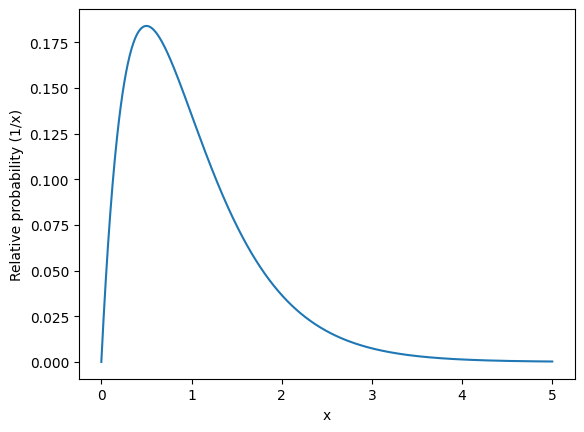

In [ ]:
x = np.linspace(0,5,1000)
phi = phif(x)
plt.plot(x,phi)
plt.xlabel('x')
plt.ylabel('Relative probability (1/x)')

## Normalize by numerical integration

Text(0, 0.5, 'Relative probability (1/x)')

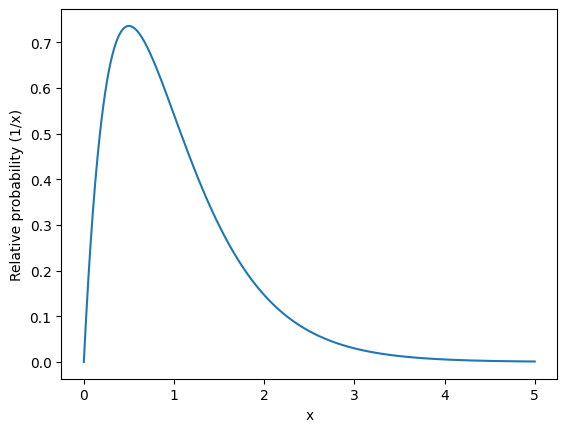

In [ ]:
N,err = quad(phif,0,5)

def phif_norm(x):
    return phif(x)/N

plt.plot(x,phif_norm(x))
plt.xlabel('x')
plt.ylabel('Relative probability (1/x)')


Most probable value of $T$????

Can find by determining the maximum of the curve, such as by taking the derivative and finding where it equals zero.

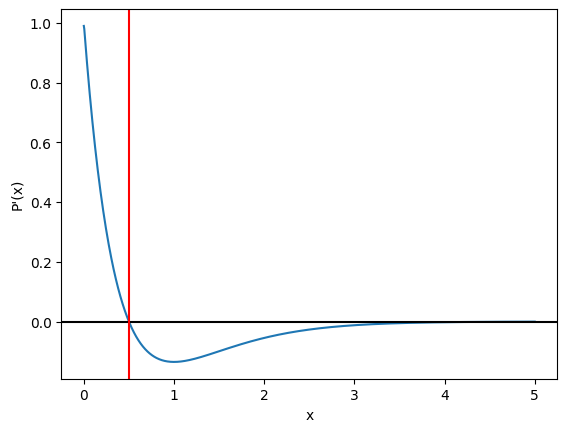

In [ ]:
def Deriv(x):
    return np.gradient(phif(x),x)

plt.plot(x,Deriv(x))
plt.xlabel('x')
plt.ylabel("P'(x)")
plt.axhline(0,color ='k', ls='-')
plt.axvline(0.5,color = 'r', ls='-')

Red line added to highlight that the graph is crossing the x-axis at P'(x) = 0.5

## Expectation value of $x$:

Expectation value of x =  1.0


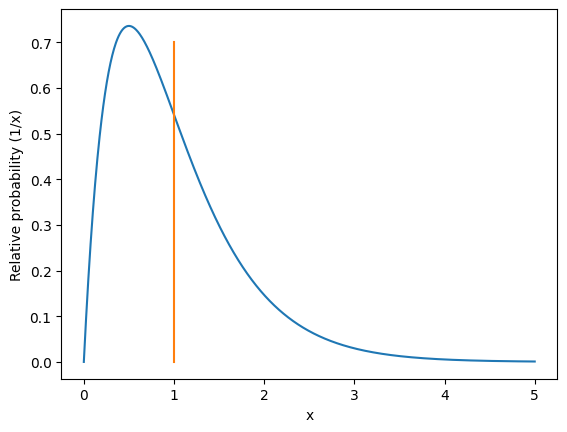

In [ ]:
def Xphif(x):
    return x*phif_norm(x)
Xbar,err = quad(Xphif,0,5)
print("Expectation value of x = {:4.1f}".format(Xbar))

plt.plot(x,phif_norm(x))
plt.xlabel('x')
plt.ylabel('Relative probability (1/x)')
plt.plot([Xbar,Xbar],[0,0.7],ls='-')

## Variance and standard deviation

In [ ]:
def X2phif(x):
    return x*x*phif_norm(x)
X2bar,err = quad(X2phif,0,5)
print("Expectation value of X**2 = {:4.1f}".format(X2bar))

Xrms=np.sqrt(X2bar)
print("Room mean square T ={:4.1f}".format(Xrms))

variance = X2bar-Xbar*Xbar
print("Variance ={:4.1f}".format(variance))

stddev = np.sqrt(variance)
print("Standard deviation ={:4.1f}".format(stddev))


Expectation value of X**2 =  1.5
Room mean square T = 1.2
Variance = 0.5
Standard deviation = 0.7


##Problem 3


In [ ]:
#It's late on a Friday night and people are stumbling up Notre Dame Ave. to their dorms. You
#observe one particularly impaired individual who is taking steps of equal length 1m to the north or
#south (i.e., in one dimension), with equal probability.


#1. What is the furthest distance could walk after 20 steps?

#set randomly either moving forward or backwards by 1 or -1 m (with equal probability) with a max size of 20 m
steps = np.random.choice([-1, 1], size=20)


#the total distance is the sum of the steps
distance = np.sum(steps)

print("Furthest distance after 20 steps:", abs(distance))


Furthest distance after 20 steps: 6


In [ ]:
#2. What is the probability that the person won't have traveled any net distance
#at all after 20 steps?

# Simulate multiple random walks to calculate the probability
num_simulations = 1000
no_travel_count = 0

for i in range(num_simulations):
    steps = np.random.choice([-1, 1], size=20)
    distance = np.sum(steps)

    #making an if statement, to see if that the total net is 0 in that simulation, we add to the counter
    if distance == 0:
        no_travel_count += 1

#probability = no distance travelled / number of simulations
probability_no_travel = no_travel_count / num_simulations

print("Probability of not traveling any net distance:", probability_no_travel)



Probability of not traveling any net distance: 0.17


In [ ]:
#3. What is the probability that the person has traveled half the maximum
# distance after 20 steps?

# Simulate multiple random walks to calculate the probability
num_simulations = 1000
half_max_distance_count = 0

for _ in range(num_simulations):
    steps = np.random.choice([-1, 1], size=20)
    distance = np.sum(steps)
    if abs(distance) == 10:  # Half of the maximum distance after 20 steps
        half_max_distance_count += 1

probability_half_max_distance = half_max_distance_count / num_simulations
print("Probability of traveling half the maximum distance:", probability_half_max_distance)


Probability of traveling half the maximum distance: 0.039


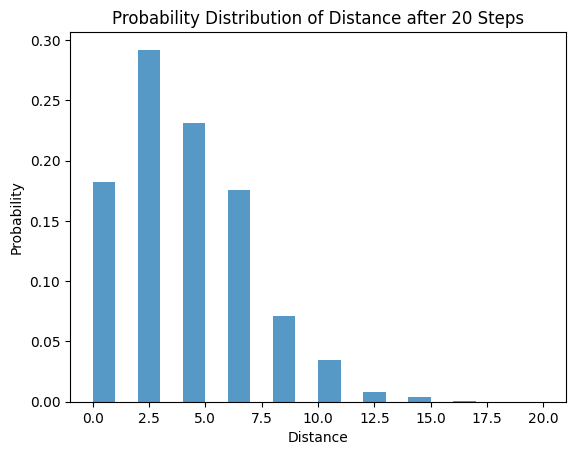

In [ ]:
#4. . Plot the probability of traveling a given distance vs distance. Does the
#probability distribution look familiar? You'll see it again when we talk about
#diffusion.

# Simulate multiple random walks to create the probability distribution
num_simulations = 1000
distances = []

for _ in range(num_simulations):
    steps = np.random.choice([-1, 1], size=20)
    distance = np.sum(steps)
    distances.append(abs(distance))

# Plotting the probability distribution
plt.hist(distances, bins=range(0, 21), density=True, alpha=0.75)
plt.xlabel("Distance")
plt.ylabel("Probability")
plt.title("Probability Distribution of Distance after 20 Steps")
plt.show()
